# Intro to XG Boost API

Ref. Datacamp

In [1]:
import pandas as pd

In [2]:
import xgboost as xgb

In [3]:
pd.set_option("display.max.columns", 100)

In [4]:
dfAmes = pd.read_csv('./datasetXGBoost/ames_housing_trimmed_processed.csv')

In [5]:
dfAmes.shape

(1460, 57)

In [6]:
dfAmes.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65.0,8450,7,5,2003,0,1710,1,0,2,1,3,0,548,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,208500
1,20,80.0,9600,6,8,1976,0,1262,0,1,2,0,3,1,460,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,181500
2,60,68.0,11250,7,5,2001,1,1786,1,0,2,1,3,1,608,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,223500
3,70,60.0,9550,7,5,1915,1,1717,1,0,1,0,3,1,642,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,140000
4,60,84.0,14260,8,5,2000,0,2198,1,0,2,1,4,1,836,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,250000


In [7]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.metrics import mean_squared_error

In [9]:
XAmes = dfAmes.iloc[:, :-1]

In [11]:
YAmes = dfAmes.iloc[:, -1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(XAmes, YAmes, test_size=0.2, random_state=123)

In [14]:
xg_reg = xgb.XGBRegressor(objective="reg:linear", n_estimators=10, seed=123)

In [15]:
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
       silent=True, subsample=1)

In [17]:
pred_train = xg_reg.predict(X_train)

In [18]:
pred_test = xg_reg.predict(X_test)

In [19]:
import numpy as np

In [20]:
np.sqrt(mean_squared_error(y_train, pred_train))

78309.01129928949

In [22]:
np.sqrt(mean_squared_error(y_test, pred_test))

78847.40175843415

### Ames housing data using linear base learners

For linear learners we can only use XG Boost's API. Convert the data to DMatrix to first use it. 

In [27]:
DM_train = xgb.DMatrix(X_train, y_train)

In [29]:
DM_test = xgb.DMatrix(X_test, y_test)

In [30]:
params = {"booster": "gblinear", "objective": "reg:linear"}

In [31]:
xg_reg_linear = xgb.train(params=params, dtrain=DM_train, num_boost_round=5)

In [33]:
pred_linear_test = xg_reg_linear.predict(DM_test)

In [34]:
pred_linear_train = xg_reg_linear.predict(DM_train)

In [35]:
np.sqrt(mean_squared_error(y_test, pred_linear_test))

44331.64506083733

In [37]:
np.sqrt(mean_squared_error(y_train, pred_linear_train))

42694.039836739226

### Evaluating model quality

In [39]:
housing_dmatrix = xgb.DMatrix(data=dfAmes.iloc[:, :-1], label=dfAmes.iloc[:, -1])

In [60]:
cv_results = xgb.cv(dtrain=housing_dmatrix, params={"objective":"reg:linear", "max_depth":4}, nfold=4, \
                   num_boost_round=40, metrics="rmse", as_pandas=True, seed=123);

[17:41:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:41:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[17:41:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[17:41:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:41:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:41:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:41:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:41:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:41:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[17:41:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:41:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:41:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:41:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:41:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[17:41:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:41:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:41:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[17:41:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_

In [61]:
import matplotlib.pyplot as plt

In [62]:
%matplotlib inline

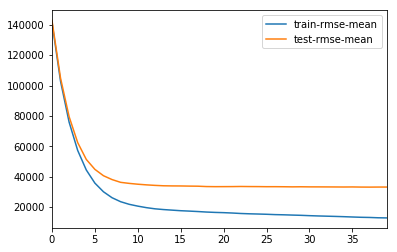

In [63]:
cv_results.plot(y = ['train-rmse-mean', 'test-rmse-mean']);

In [70]:
cv_results_linear = xgb.cv(dtrain=housing_dmatrix, params={"objective":"reg:linear", "booster":"gblinear", \
                                                           "max_depth":4}, nfold=4, num_boost_round=100, \
                           metrics = "rmse", as_pandas=True, seed=123)

In [71]:
cv_results_linear.tail()

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
95,34422.206055,1082.829845,32026.224121,328.211879
96,34415.423828,1088.089765,32016.951172,329.066858
97,34408.889648,1093.286167,32007.943360,329.897972
98,34402.594726,1098.418522,31999.191406,330.707643
99,34396.530273,1103.485996,31990.686035,331.495858


In [72]:
cv_results.tail()

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
35,33227.852051,5840.189833,13443.786377,371.130095
36,33144.481934,5864.098236,13251.523926,418.174523
37,33114.161133,5888.374632,13140.642578,395.142322
38,33156.041992,5965.194395,12932.084228,403.095641
39,33161.876465,5966.136077,12837.637695,431.277758


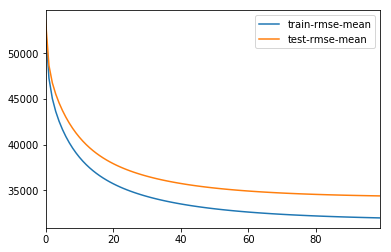

In [73]:
cv_results_linear.plot(y = ['train-rmse-mean', 'test-rmse-mean']);